
# Basketball_best_team
**DOMAIN: Sports**

• **DATA DESCRIPTION:**
Basketball_data.csv - The data set contains information on all the teams so far participated in all the past tournaments.

**• ATTRIBUTE INFORMATION:**
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. Played Games: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. Tournament Champion: How many times has the team been a champion of the tournaments so far?
11. Runner-up: How many times has the team been a runner-up in the tournaments so far?
12. TeamLaunch: The year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

**• OBJECTIVE:**

The company’s management wants to invest in proposals for managing some of the best teams in the league. Hence, the company wants to understand which teams they can approach which will be a deal win for them.

Steps and tasks:
1. Read the data set, clean the data, and prepare a final dataset to be used for analysis.
2. Perform detailed statistical analysis and EDA using univariate, bivariate, and multivariate EDA techniques to get a data-driven insight on recommending which teams they can approach which will be a deal win for them.
3. Use statistical techniques and visualization techniques to come up with the best-performing team, oldest team, team with highest goals, team with lowest performance, etc., and many more.


IMPORT ALL THE REQUIRED PACKAGES AND GET THE INFO ABOUT DATASET

In [ ]:
import numpy as np      # IMPORT ALL THE REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Basketball = pd.read_csv('./Basketball.csv') # IMPORT THE DATA

Basketball.describe(include='all')
Basketball.info() # There are no null values in any of the column. There are 2 columns with datatype as int64 (Tournament and HighestPositionHeld), rest all the columns are of object datatype.
Basketball.shape # The dataframe has 61 rows and 13 columns with not null values.
Basketball.head()
Basketball.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


DATA CLEANING

In [ ]:
# To analyse the data, counting the missing values

missing_value_counts = Basketball.isnull().sum()
print(missing_value_counts[0:13])

Basketball= Basketball.replace('-',0)
# In 'TeamLaunch' column there are characters like 'to', '-', '~'.  so cleaning data by removing these.

Basketball = Basketball.replace(to_replace ='to', value = '-', regex = True)
Basketball = Basketball.replace(to_replace ='_', value = '-', regex = True)
Basketball = Basketball.replace(to_replace ='~', value = '-', regex = True)

Basketball.head(10)

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931-32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1


In [ ]:
# Change the object datatype into int

import re  # importing regular expressions library

length_col=len(Basketball['TeamLaunch'])

# Formatting the teamlauch column so it can be processed as int
for dlaunch in range(length_col):
    x=Basketball.loc[dlaunch,"TeamLaunch"]
    temp = re.findall(r'\d\d\d\d',x)
    Basketball.loc[dlaunch,"TeamLaunch"]=temp

# Changing the data type of 'teamlauch' as int
Basketball['TeamLaunch'] = Basketball['TeamLaunch'].astype(int)

Basketball.head(10)
# Changing the data type of all the columns except 'Team'column of dataframe as int
Basketball_conv = Basketball.loc[:,Basketball.columns !='Team']
Basketball_conv = Basketball_conv.astype(int)


In [ ]:
Basketball_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Tournament           61 non-null     int64
 1   Score                61 non-null     int64
 2   PlayedGames          61 non-null     int64
 3   WonGames             61 non-null     int64
 4   DrawnGames           61 non-null     int64
 5   LostGames            61 non-null     int64
 6   BasketScored         61 non-null     int64
 7   BasketGiven          61 non-null     int64
 8   TournamentChampion   61 non-null     int64
 9   Runner-up            61 non-null     int64
 10  TeamLaunch           61 non-null     int64
 11  HighestPositionHeld  61 non-null     int64
dtypes: int64(12)
memory usage: 5.8 KB


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Appending the 'Team' column which is of data type 'string' and dropped while doing type conversion with the converted dataframe
Basketball_conv['Team']=(Basketball['Team'])
first_column =Basketball_conv.pop('Team')
Basketball_conv.insert(0, 'Team', first_column) # Insert 'Team' as the first column
Basketball_conv.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [ ]:
# Getting the teams those who played maximum number of Tournament
Basketball_conv.groupby(['Team'])['Tournament'].sum().sort_values(ascending=False).head(5)

Team
Team 1    86
Team 5    86
Team 2    86
Team 7    82
Team 4    82
Name: Tournament, dtype: int64

In [ ]:
# Getting the teams those who played minimum number of Tournament
Basketball_conv.groupby(['Team'])['Tournament'].sum().sort_values(ascending=True).head(5)

Team
Team 56    1
Team 59    1
Team 58    1
Team 61    1
Team 57    1
Name: Tournament, dtype: int64

In [ ]:
# Calculate the winning percentage of the team from PlayedGames	and WonGames and adding extra column to the dataframe
Basketball_conv['WinResult'] = Basketball_conv['WonGames']/Basketball_conv['PlayedGames']
Basketball_conv['WinResult'].dtype
TopWin = Basketball_conv['WinResult'].sort_values(ascending =False).head(10)
print('The top 5 teams, which won the maximum games are')
Basketball_conv.groupby(['Team'])['WinResult'].sum().sort_values(ascending =False).head(5)

The top 5 teams, which won the maximum games are


Team
Team 1    0.596307
Team 2    0.572411
Team 3    0.474751
Team 4    0.445571
Team 5    0.437726
Name: WinResult, dtype: float64

In [ ]:
# Calculate the percentage of getting championship against tounament played
Basketball_conv['Champions'] = Basketball_conv['TournamentChampion']/Basketball_conv['Tournament']
Basketball_conv['Champions'].dtype
TopChampions = Basketball_conv['Champions'].sort_values(ascending =False).head(10)
print('The top 5 teams which became Champions are:')
Basketball_conv.groupby(['Team'])['Champions'].sum().sort_values(ascending =False).head(5)

The top 5 teams which became Champions are:


Team
Team 1    0.383721
Team 2    0.290698
Team 3    0.125000
Team 5    0.093023
Team 4    0.073171
Name: Champions, dtype: float64

In [ ]:
# Calculate the total period, the team is playing the tournament assuming the teams included upto 2020
Basketball_conv['TeamAge'] = 2020-Basketball_conv['TeamLaunch']
print('The oldest team in the tournament is of age: ',Basketball_conv['TeamAge'].max())
print('The oldest team in the tournament are: ')
print(Basketball_conv[Basketball_conv['TeamAge'] == Basketball_conv['TeamAge'].max()])

The oldest team in the tournament is of age:  91
The oldest team in the tournament are: 
       Team  Tournament  Score  ...  WinResult  Champions  TeamAge
0    Team 1          86   4385  ...   0.596307   0.383721       91
1    Team 2          86   4262  ...   0.572411   0.290698       91
2    Team 3          80   3442  ...   0.474751   0.125000       91
4    Team 5          86   3368  ...   0.437726   0.093023       91
6    Team 7          82   2792  ...   0.361005   0.000000       91
7    Team 8          70   2573  ...   0.375326   0.028571       91
13  Team 14          44   1416  ...   0.317227   0.000000       91
44  Team 45           7    107  ...   0.330769   0.000000       91
51  Team 52           4     56  ...   0.291667   0.000000       91
53  Team 54           3     42  ...   0.333333   0.000000       91

[10 rows x 16 columns]


In [ ]:
print('The newest team in the tournament is of age: ',Basketball_conv['TeamAge'].min())
print('The newest team in the tournament are: ')
print(Basketball_conv[Basketball_conv['TeamAge'] == Basketball_conv['TeamAge'].min()])

The newest team in the tournament is of age:  3
The newest team in the tournament are: 
       Team  Tournament  Score  ...  WinResult  Champions  TeamAge
60  Team 61           1      0  ...        NaN        0.0        3

[1 rows x 16 columns]


In [ ]:
# Getting the teams those who played maximum number of Tournament against the age of the team
Basketball_conv['TeamExperience'] = Basketball_conv['TeamAge']/Basketball_conv['Tournament']
Basketball_conv['TeamExperience'].dtype
print('The top 5 teams with maximum experience of Tournament are:')
Basketball_conv.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =False).head(5)

The top 5 teams with maximum experience of Tournament are:


Team
Team 59    69.000000
Team 60    65.000000
Team 58    64.000000
Team 55    35.000000
Team 54    30.333333
Name: TeamExperience, dtype: float64

In [ ]:
print('The 5 teams with minimum experience of Tournament are:')
Basketball_conv.groupby(['Team'])['TeamExperience'].sum().sort_values(ascending =True).head(5)

The 5 teams with minimum experience of Tournament are:


Team
Team 1    1.058140
Team 5    1.058140
Team 2    1.058140
Team 4    1.085366
Team 7    1.109756
Name: TeamExperience, dtype: float64

In [ ]:
# Calculate the percentage of getting championship against experience
Basketball_conv['TeamPerformance'] = Basketball_conv['Champions']/Basketball_conv['TeamExperience']
Basketball_conv['TeamPerformance'].dtype
print('The top 5 teams with the percentage of getting championship against experience are:')
Basketball_conv.groupby(['Team'])['TeamPerformance'].sum().sort_values(ascending =False).head(5)

The top 5 teams with the percentage of getting championship against experience are:


Team
Team 1    0.362637
Team 2    0.274725
Team 3    0.109890
Team 5    0.087912
Team 4    0.067416
Name: TeamPerformance, dtype: float64

In [ ]:
# Lets Filter the dataframe to understand age of the team, WinResult, Champions,Team Experience and Team Performance
df_1=Basketball_conv.filter(items=['Team', 'TeamAge', 'TeamExperience','TeamPerformance','WinResult','Champions'])
df_1

,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.058140,0.362637,0.596307,0.383721
1,Team 2,91,1.058140,0.274725,0.572411,0.290698
2,Team 3,91,1.137500,0.109890,0.474751,0.125000
3,Team 4,89,1.085366,0.067416,0.445571,0.073171
4,Team 5,91,1.058140,0.087912,0.437726,0.093023
...,...,...,...,...,...,...
56,Team 57,11,11.000000,0.000000,0.210526,0.000000
57,Team 58,64,64.000000,0.000000,0.233333,0.000000
58,Team 59,69,69.000000,0.000000,0.233333,0.000000
59,Team 60,65,65.000000,0.000000,0.166667,0.000000


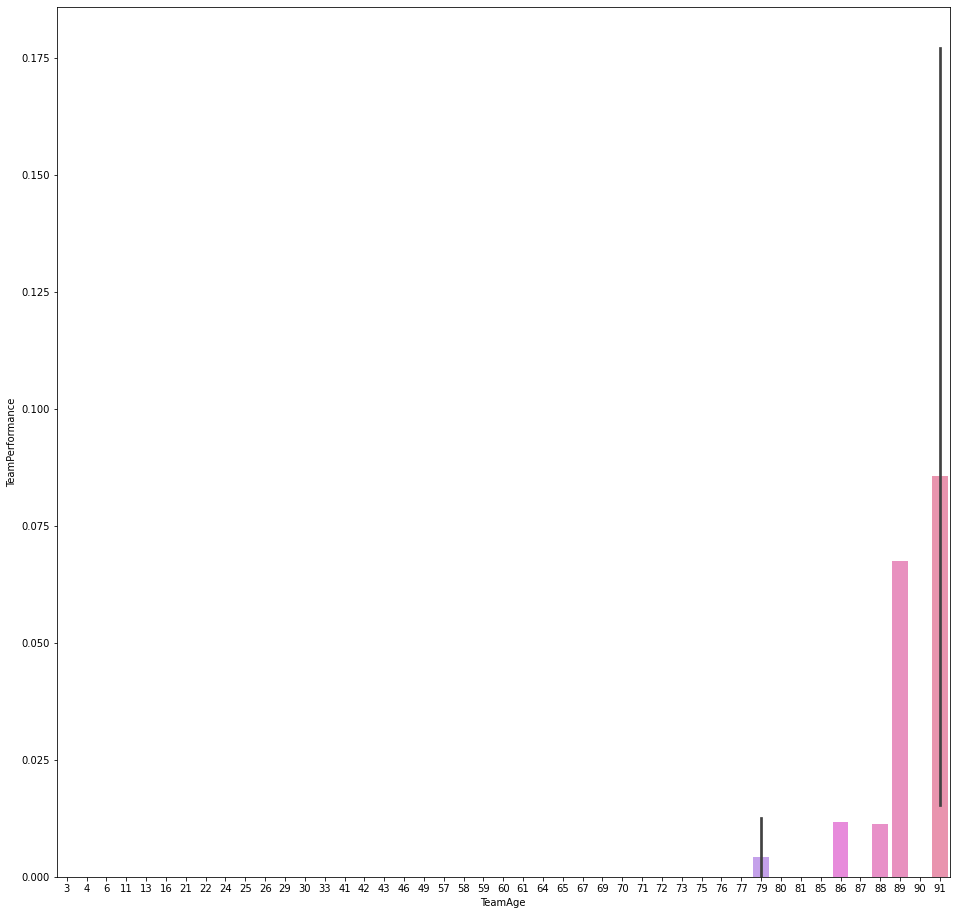

In [ ]:
# Let's find the team with better performance
plt.figure(figsize = (16,16))
# Plot the teamAge against the Team Performance
sns.barplot(x='TeamAge', y='TeamPerformance',data=df_1)

**It is observed that Team of the age 91 has better performance.(Team 1, 2 and 3)**

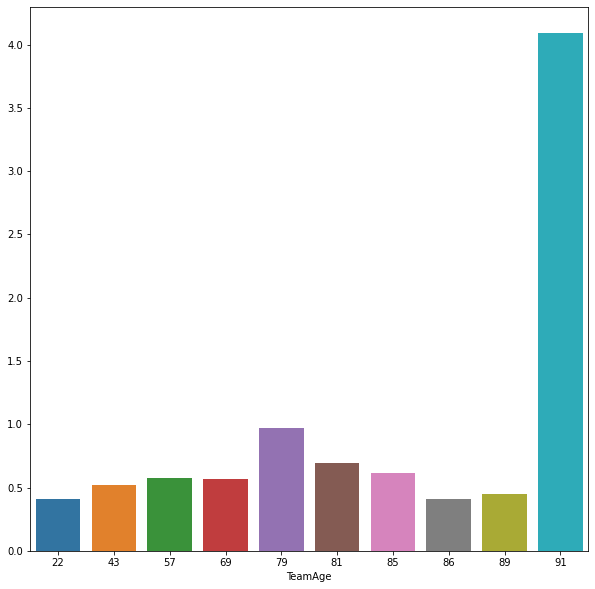

In [ ]:
# Let's find the team with better win results
# Plot the top 10 teams which gave better win results
df_2=Basketball_conv.groupby(['TeamAge'])['WinResult'].sum().sort_values(ascending =False).head(10)
plt.figure(figsize = (10,10))
sns.barplot(y = df_2.values ,x = df_2.index)

 **It is observed that Team of age 91 and 79 has Won more games with respect to the total games played.**

In [ ]:
#  Let's find the correlation matrix between all the performance metrics
corr=df_1.corr()
corr

,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
TeamAge,1.000000,0.046113,0.285774,0.491259,0.292787
TeamExperience,0.046113,1.000000,-0.149389,-0.450864,-0.153466
TeamPerformance,0.285774,-0.149389,1.000000,0.766421,0.999545
WinResult,0.491259,-0.450864,0.766421,1.000000,0.772811
Champions,0.292787,-0.153466,0.999545,0.772811,1.000000


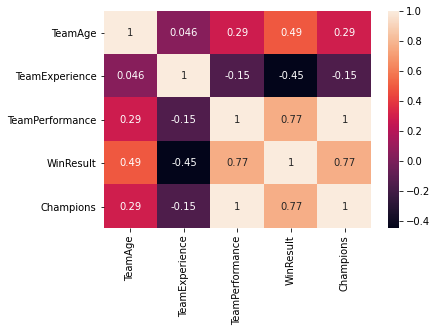

In [ ]:
sns.heatmap(corr, annot = True)

**The Correlation table shows high correlation between Team Performance and Tournament Champions**.

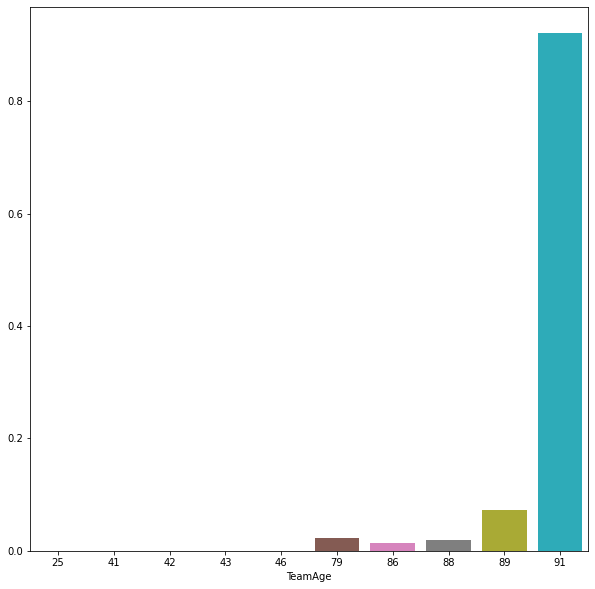

In [ ]:
# Let's find the team which has got championship
# Plot the top 10 teams which were champions
df_3=Basketball_conv.groupby(['TeamAge'])['Champions'].sum().sort_values(ascending =False).head(10)
plt.figure(figsize = (10,10))
sns.barplot(y = df_3.values ,x = df_3.index)

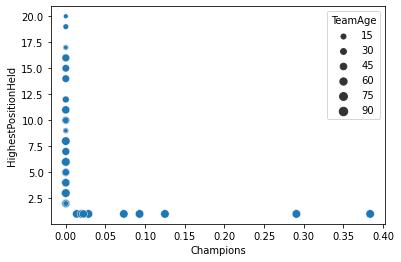

In [ ]:
# Lets compare New vs old team's performance with respect to age and Highest Position based on Championship
sns.scatterplot(data=Basketball_conv, x="Champions", y="HighestPositionHeld",size="TeamAge")

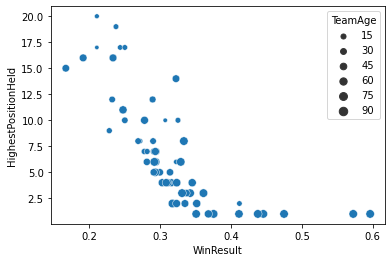

In [ ]:
# Lets compare New vs old team's performance with respect to age and Highest Position based on WinResult
sns.scatterplot(data=Basketball_conv, x="WinResult", y="HighestPositionHeld",size="TeamAge")

Team of age 15 (Young Team) held the Highest Position

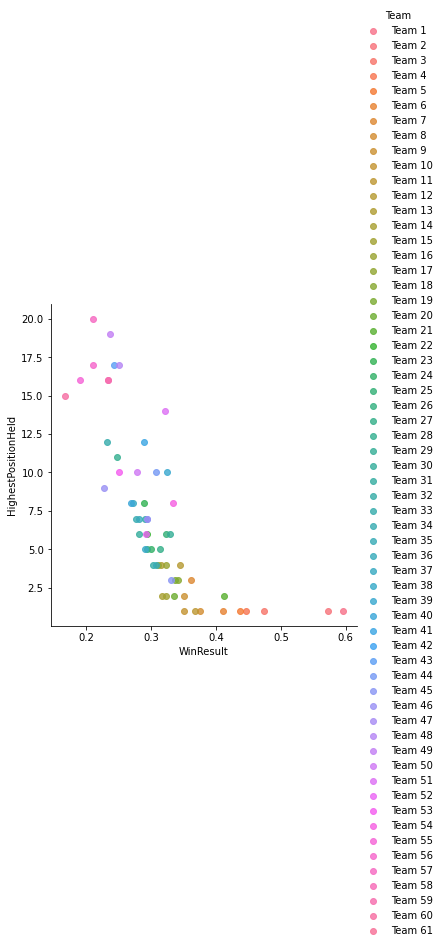

In [ ]:
sns.lmplot(x="WinResult", y="HighestPositionHeld", hue = "Team", data=Basketball_conv)

Team 57 held the Highest Position

**TOP 5 TEAMS FROM BELOW CONSOLIDATED TABLES A AND B CAN TREATED AS BEST PERFORMERS AND HENCE COMPANY CAN CHOOSE BETWEEN THESE TEAMS FOR SPONSORSHIP**

In [ ]:
df_4 = df_1.sort_values(by='WinResult',ascending=False) # Top performing teams
print('TOP OLD TEAMS TABLE A')
df_4.sort_values(by='TeamAge',ascending=False).head(5) # Top Performing old teams

TOP OLD TEAMS TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.05814,0.362637,0.596307,0.383721
51,Team 52,91,22.75000,0.000000,0.291667,0.000000
2,Team 3,91,1.13750,0.109890,0.474751,0.125000
4,Team 5,91,1.05814,0.087912,0.437726,0.093023
1,Team 2,91,1.05814,0.274725,0.572411,0.290698


In [ ]:
df_5 = df_1.sort_values(by='TeamExperience',ascending=False) # Top performing teams
print('TOP OLD TEAMS :TABLE B')
df_5.sort_values(by='TeamAge',ascending=False).head(5)

TOP OLD TEAMS :TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
0,Team 1,91,1.058140,0.362637,0.596307,0.383721
4,Team 5,91,1.058140,0.087912,0.437726,0.093023
53,Team 54,91,30.333333,0.000000,0.333333,0.000000
51,Team 52,91,22.750000,0.000000,0.291667,0.000000
1,Team 2,91,1.058140,0.274725,0.572411,0.290698


In [ ]:
# If Top Performing old teams above are already in contract with competitors
# then below Young Teams Can be approach
print('Top Young Teams: TABLE A')
df_4.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE A


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
60,Team 61,3,3.000000,0.0,NaN,0.0
55,Team 56,4,4.000000,0.0,0.210526,0.0
43,Team 44,6,2.000000,0.0,0.307018,0.0
56,Team 57,11,11.000000,0.0,0.210526,0.0
36,Team 37,13,2.166667,0.0,0.271930,0.0


In [ ]:
print('Top Young Teams: TABLE B')
df_5.sort_values(by='TeamAge',ascending=True).head(5)

Top Young Teams: TABLE B


,Team,TeamAge,TeamExperience,TeamPerformance,WinResult,Champions
60,Team 61,3,3.000000,0.0,NaN,0.0
55,Team 56,4,4.000000,0.0,0.210526,0.0
43,Team 44,6,2.000000,0.0,0.307018,0.0
56,Team 57,11,11.000000,0.0,0.210526,0.0
36,Team 37,13,2.166667,0.0,0.271930,0.0


3. Following are improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future.

*  Teams which are already in contract with competitors
*  The year for which the decision is to be made
*   Top players of the team


